In [1]:
from src.backtester import *

In [2]:
df = pd.read_csv('./Dataset/stock_d.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,26.929758,62546380.0,A
1,1999-11-19,30.713518,30.758226,28.478184,28.880545,24.711128,15234146.0,A
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,26.929758,6577870.0,A
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.481606,5975611.0,A
4,1999-11-24,28.701717,29.998213,28.612303,29.372318,25.131901,4843231.0,A
...,...,...,...,...,...,...,...,...
22400254,2022-10-05,9.590000,9.720000,9.140000,9.510000,9.510000,132600.0,ZYXI
22400255,2022-10-06,9.540000,9.680000,9.280000,9.300000,9.300000,94600.0,ZYXI
22400256,2022-10-07,9.270000,9.400000,8.750000,8.800000,8.800000,141300.0,ZYXI
22400257,2022-10-10,8.740000,8.910000,8.600000,8.710000,8.710000,90100.0,ZYXI


In [17]:
bt = BacktestBase('GOOG', '2019-11-18', '2022-10-10',10000, df,False)

In [18]:
bt.data

,price,return
Date,,
2019-11-19,65.773003,-0.003976
2019-11-20,65.152496,-0.009479
2019-11-21,65.067497,-0.001305
2019-11-22,64.766998,-0.004629
2019-11-25,65.334503,0.008724
...,...,...
2022-10-04,102.410004,0.030839
2022-10-05,102.220001,-0.001857
2022-10-06,102.239998,0.000196


In [19]:
bt.place_buy_order(10, units=10, amount=10000)

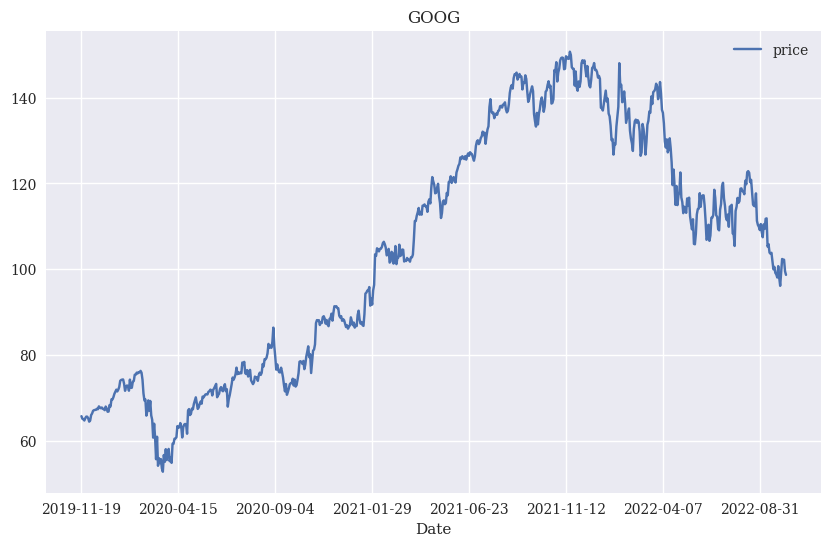

In [20]:
bt.plot_data()


In [13]:
def run_strategies():
    # lsbt.run_sma_strategy(5, 20)
    # lsbt.run_momentum_strategy(5)
    lsbt.run_mean_reversion_strategy(10, 5)
lsbt = BacktestLongShort('GOOG', '2022-06-01', '2022-10-10',1000, df,False)
run_strategies()
# # transaction costs: 10 USD fix, 1% variable
# lsbt = BacktestLongShort('AAPL.O', '2010-1-1', '2019-12-31',
#                             10000, 10.0, 0.01, False)
# run_strategies()



Running SMA strategy | SMA1=5 & SMA2=20
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 889.85
Net Performance [%] -11.01
Trades Executed [#] 12


Running momentum strategy | 5 days
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 808.66
Net Performance [%] -19.13
Trades Executed [#] 34


Running mean reversion strategy | SMA=10 & thr=5
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 1254.86
Net Performance [%] 25.49
Trades Executed [#] 15
hellow world 


In [3]:
def grid_search(param_list1, param_list2):
    best_param_list = []
    best_per = 0
    for p1 in param_list1:
        for p2 in param_list2:
            if p1>=p2:
                am, per, tra = lsbt.run_mean_reversion_strategy(p1, p2, True)
                if per > best_per:
                    best_per = per
                    print(f'---------------------------------------  최대 수익률 : {best_per}  ---------------------------------------')
                    best_param_list.append([p1,p2,tra,best_per])
            else:
                pass
    return best_param_list

In [11]:
def run_strategies(sma, thr):
    print()
    lsbt.run_mean_reversion_strategy(sma, thr)
lsbt = BacktestLongShort('GOOG', '2022-09-01', '2022-10-10',1000, df,False)

run_strategies(13, 5)




Running mean reversion strategy | SMA=13 & thr=5
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 1016.56
Net Performance [%] 1.66
Trades Executed [#] 3


In [6]:
lsbt = BacktestLongShort('GOOG', '2021-07-01', '2022-10-10',1000, df,False)
l = grid_search(range(1,100), range(1,100))



Running mean reversion strategy | SMA=1 & thr=1
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 1000.00
Net Performance [%] 0.00
Trades Executed [#] 1


Running mean reversion strategy | SMA=2 & thr=1
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 1206.92
Net Performance [%] 20.69
Trades Executed [#] 146


Running mean reversion strategy | SMA=2 & thr=2
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 1138.08
Net Performance [%] 13.81
Trades Executed [#] 61
---------------------------------------  최대 수익률 : 13.808429718017578  ---------------------------------------


Running mean reversion strategy | SMA=3 & thr=1
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 1211.93
Net Performance [%] 21.19
Trades Executed [#] 142


Running mean reversion strategy | SMA=3 & thr=2
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 1141.85
Net Performance [%] 14.18
Trades Executed [#] 89
---------------------------------------  최대 수익률 : 

In [5]:
l

[[2, 2, 10, 5.634803009033203],
 [3, 2, 20, 10.083598327636718],
 [7, 2, 22, 15.947995758056596]]

In [13]:
type(df)

pandas.core.frame.DataFrame

In [26]:
import datetime as dt
d = dt.datetime.strptime(df.Date.iloc[-1], '%Y-%m-%d')-dt.datetime.strptime(df.Date.iloc[0], '%Y-%m-%d')


In [28]:
d.days

8363